In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [41]:

from PIL import Image
import os


In [6]:
path = 'datasets'
mnist_train = pd.read_csv(path+'/fashion-mnist_train.csv')
mnist_test = pd.read_csv(path+'/fashion-mnist_test.csv')

# mnist_train's head:
mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
mkdir datasets\working\test

In [ ]:
mkdir datasets\working\train



In [32]:
def csv2img(csv,path='datasets/working/train/'): 
    """
    Convert pixel values from .csv to .png image
    """
    for i in range(len(csv)):
        # csv.iloc[i,1:].to_numpy() returns pixel values array for i'th imag excluding the label 
        # next step: reshape the array to original shape(28,28) and add missing color channels 
        result = Image.fromarray(np.uint8(np.stack(np.rot90(csv.iloc[i,1:].to_numpy().reshape((28,28)))*3,axis=-1))) 
        # save the image:
        result.save(f'{path}{str(i)}.png')
        
    print(f'{len(csv)} images were created.')

# let's run the fuction:
csv2img(mnist_train)
csv2img(mnist_test,path='datasets/working/test/')

60000 images were created.
10000 images were created.


In [34]:
len(os.listdir('datasets/working/train')) == len(mnist_train)

True

In [35]:
len(os.listdir('datasets/working/test')) == len(mnist_test)

True

In [36]:
dict_fashion = {
0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

mnist_train['label_text'] = mnist_train['label'].apply(lambda x: dict_fashion[x])
mnist_test['label_text'] = mnist_test['label'].apply(lambda x: dict_fashion[x])

# add image names:
mnist_train['img'] = pd.Series([str(i)+'.png' for i in range(len(mnist_train))])
mnist_test['img'] = pd.Series([str(i)+'.png' for i in range(len(mnist_test))])

In [37]:
mnist_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label_text,img
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Pullover,0.png
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Ankle boot,1.png
2,6,0,0,0,0,0,0,0,5,0,...,0,30,43,0,0,0,0,0,Shirt,2.png
3,0,0,0,0,1,2,0,0,0,0,...,0,0,0,1,0,0,0,0,T-shirt/top,3.png
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dress,4.png


In [38]:
mnist_train[['img','label_text']].to_csv('datasets/working/labels.csv',index=False)
mnist_test[['img','label_text']].to_csv('datasets/working/test.csv',index=False)

In [39]:
data = (ImageList.from_csv('/kaggle/working/', 'labels.csv', folder='train')
        #Where to find the data? -> in '/kaggle/working/train' folder
        .split_by_rand_pct(seed=12)
        #How to split in train/valid? -> randomly with the default 20% in valid. There's an option to split by folfder or by id
        .label_from_df()
        #How to label? -> use the second column of the csv file and split the tags by ' '. / can be labeled by subfolder name/ can be labeled by applying regex to image name
        #.transform(tfms)
        #Data augmentation? -> use tfms with a size of 28. 
        .databunch() # change batch size and number of workers by passing arguments: (bs=32, num_workers=4, collate_fn=bb_pad_collate)
        #Finally -> use the defaults for conversion to databunch
        #.normalize()
       )   
        # Normalize x with mean and std, If you're using a pretrained model, you'll need to use the normalization that was used to train the model (e.g., imagenet_stats)

# Show image batch:
data.show_batch(rows=3, figsize=(4,4))

NameError: name 'ImageList' is not defined

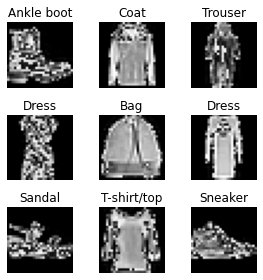

In [20]:
data.show_batch(rows=3, figsize=(4,4))

In [24]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [25]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.941544,0.780751,0.713750,00:49
1,0.652636,0.553753,0.788000,00:44
2,0.548311,0.486505,0.814333,00:44
3,0.486254,0.464214,0.827417,00:44


In [26]:
def interpret_res(plot_top_losses=True, conf_matrix=True, most_confused=False):
    """
    Result interpretation includes top losses, confusion matrix, and most confused.
    """
    
    # plot top losses:
    if plot_top_losses==True:
        interp = ClassificationInterpretation.from_learner(learn)
        losses,idxs = interp.top_losses()
        len(data.valid_ds)==len(losses)==len(idxs)
        interp.plot_top_losses(9, figsize=(12,12))

    # plot confusion matrix:
    if conf_matrix==True:
        doc(interp.plot_top_losses)
        interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

    # most confused:
    if most_confused==True:
        interp.most_confused(min_val=100)

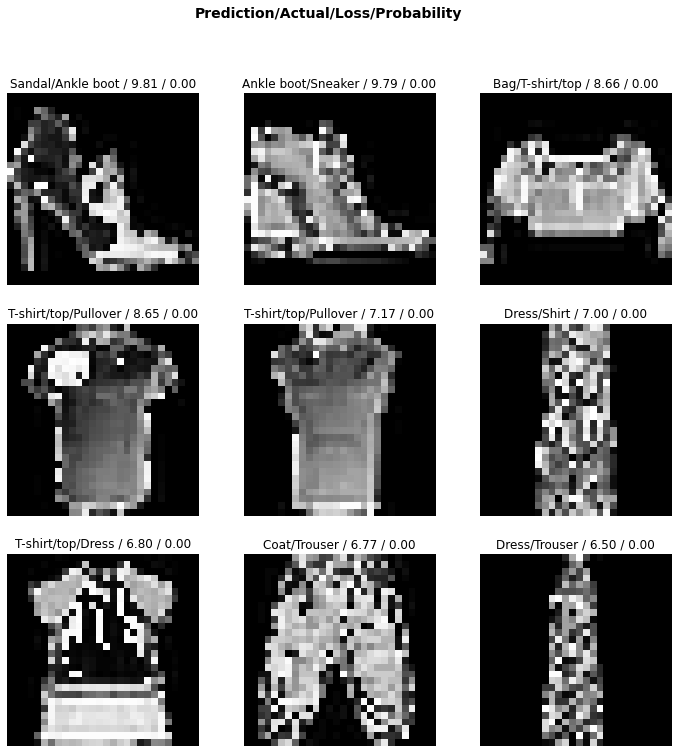

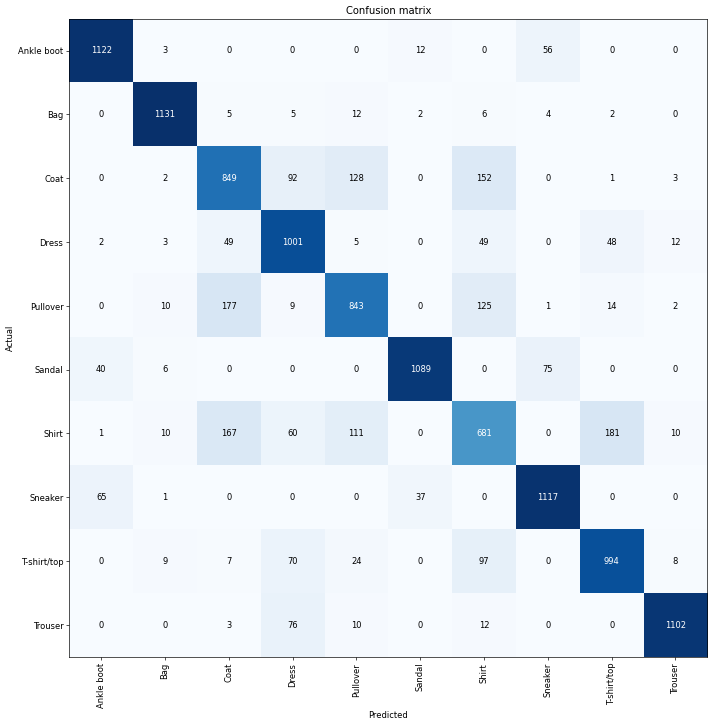

In [27]:
interpret_res()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


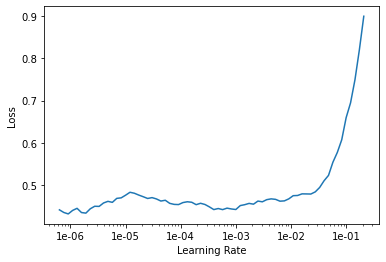

In [28]:
learn.lr_find()
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.434152,0.368083,0.859083,00:51
1,0.302321,0.323187,0.878583,00:51


In [30]:
learn.save('learn_resnet50_stage_1')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


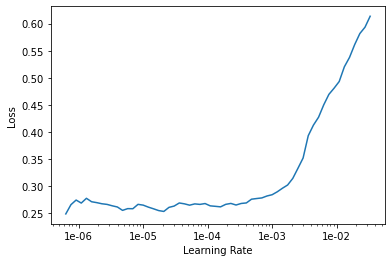

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.250525,0.322249,0.879583,00:53
1,0.236386,0.323772,0.880583,00:51
2,0.221893,0.326379,0.880833,00:51
3,0.221948,0.328941,0.880500,00:51


In [34]:
learn.save('learn_resnet50_stage_1')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


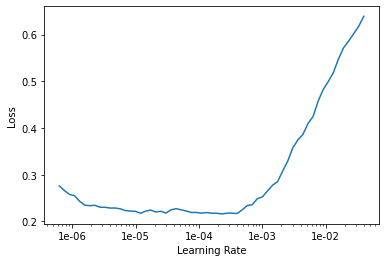

In [35]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))